### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [3]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

In [4]:
initial_size = data.shape[0]
data.drop_duplicates(inplace=True)
final_size = data.shape[0]
print(f"Initial size: {initial_size}, After removing duplicates: {final_size}")

Initial size: 20358, After removing duplicates: 19779


In [5]:
data.drop(columns=['gravatar_id'], inplace=True) 
bool_columns = ['site_admin', 'hireable']  
text_columns = ['company', 'location', 'bio', 'twitter_username']  

data[bool_columns] = data[bool_columns].notna()
data[text_columns] = data[text_columns].fillna('')

missing_values = data.isnull().sum()
print("Missing values after processing:")
print(missing_values[missing_values > 0])

Missing values after processing:
name      2589
blog     11263
email    11739
dtype: int64


In [6]:
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['updated_at'] = pd.to_datetime(data['updated_at'], errors='coerce')

In [7]:
print(data[['created_at', 'updated_at']].dtypes)

created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
dtype: object


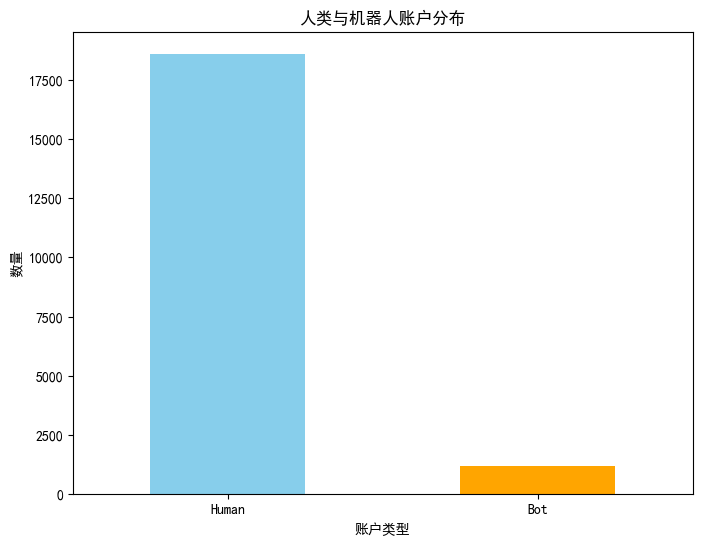

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 统计Bot和Human账户数量
label_counts = data['label'].value_counts()

# 绘制柱状图
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("人类与机器人账户分布")
plt.xlabel("账户类型")
plt.ylabel("数量")
plt.xticks(rotation=0)
plt.show()


- 选择原因：使用柱状图直观显示两类账号的数量对比，方便对比分布情况。

- 结果分析：可以看到，Human 账号远多于 Bot 账号。这表明在 GitHub 社区中，用户账号主要是人类。

- 数据洞察：通过观察人类和机器人账户的数量分布，可以推测机器人账号主要用于自动化任务或数据收集等特殊功能，不是主要的用户群体。

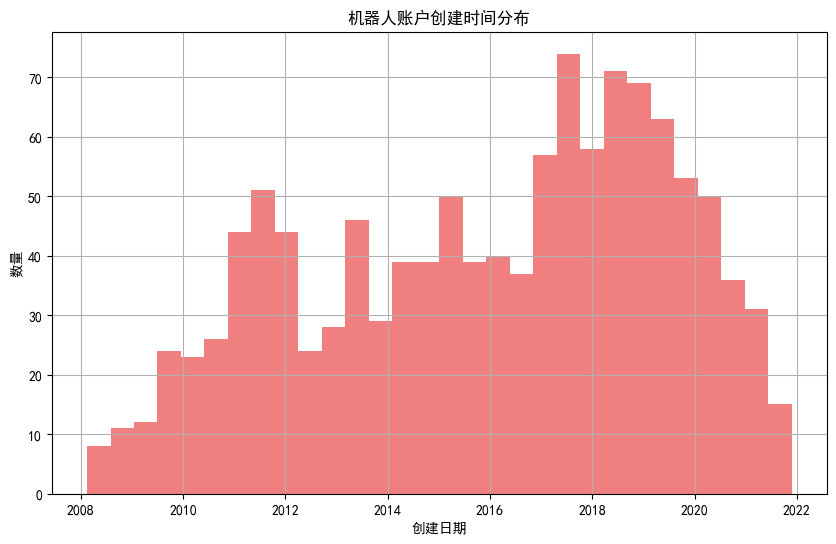

In [15]:
# 提取Bot类型账号的创建时间
bot_created_at = data[data['label'] == 'Bot']['created_at']

# 绘制直方图
plt.figure(figsize=(10, 6))
bot_created_at.hist(bins=30, color='lightcoral')
plt.title("机器人账户创建时间分布")
plt.xlabel("创建日期")
plt.ylabel("数量")
plt.show()



- 选择原因：使用直方图显示创建时间的分布，便于观察机器账号的活跃增加或减少的趋势。

- 结果分析：若创建时间在特定年份或时间段出现高峰，说明那段时间可能增加了更多的机器人账号。

- 数据洞察：可以看到，机器人账号的创建时间集中在特定年份。根据峰值年份，可以推测出某些时间段对机器人需求增加（如推出新功能或活动需要）。

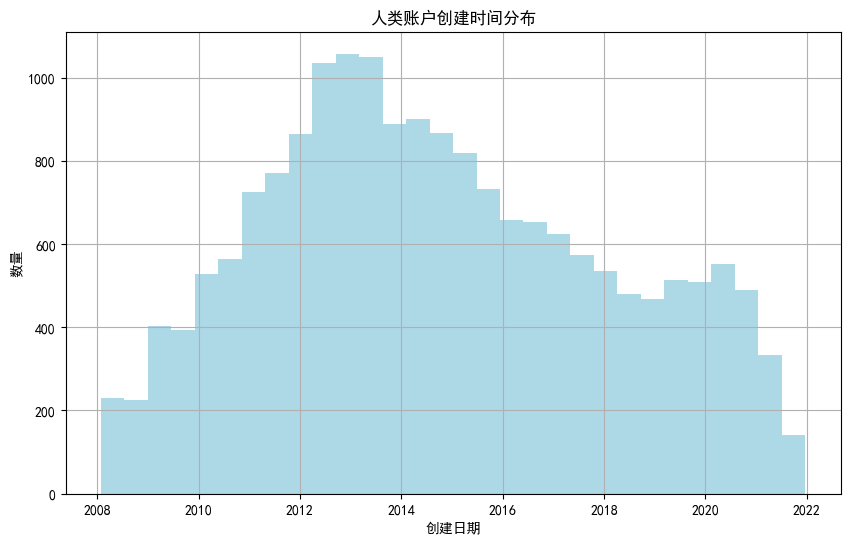

In [16]:
# 提取Human类型账号的创建时间
human_created_at = data[data['label'] == 'Human']['created_at']

# 绘制直方图
plt.figure(figsize=(10, 6))
human_created_at.hist(bins=30, color='lightblue')
plt.title("人类账户创建时间分布")
plt.xlabel("创建日期")
plt.ylabel("数量")
plt.show()



- 选择原因：与机器人账号相同，使用直方图便于观察用户增长趋势。

- 结果分析：若人类账号创建日期在某些年份明显增加，说明 GitHub 社区在那段时间吸引了大量新用户。

- 数据洞察：可以观察到，GitHub 社区在某些时间段可能因开发者数量上升或活动推广导致用户创建高峰，这也反映了开源开发的流行趋势。

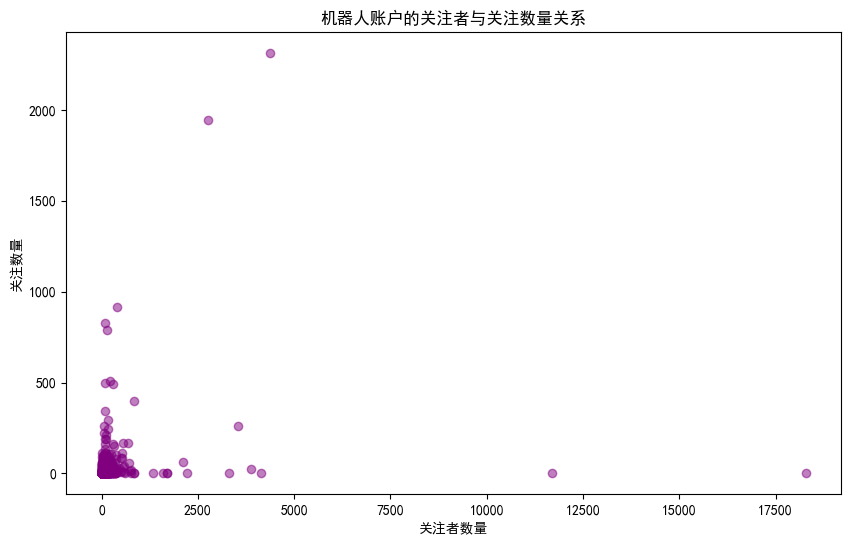

In [18]:

# 绘制散点图
bot_data = data[data['label'] == 'Bot']

plt.figure(figsize=(10, 6))
plt.scatter(bot_data['followers'], bot_data['following'], alpha=0.5, color='purple')
plt.title("机器人账户的关注者与关注数量关系")
plt.xlabel("关注者数量")
plt.ylabel("关注数量")
plt.show()



- 选择原因：散点图适合展示两个变量之间的关系。在这里，可以展示关注者数量（followers）和关注数量（following）之间是否存在相关性。

- 结果分析：点分布较为随机，且大部分点处于较低的关注者和关注数量区域，说明机器人账号之间的关注数量和关注者数量之间并无显著相关性。

- 数据洞察：大部分机器人账号几乎没有关注者或仅关注少数用户，这反映出它们主要用于执行特定的自动化任务，互动性较低。

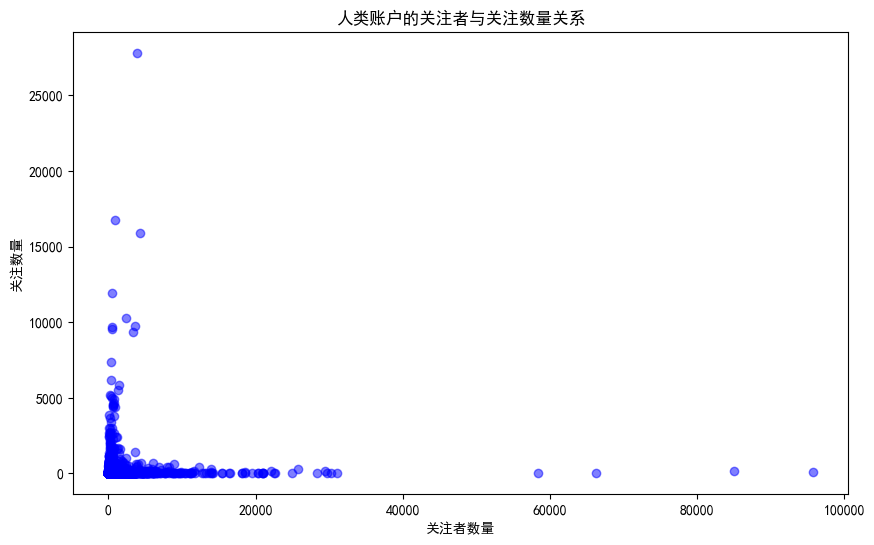

In [19]:
# 筛选出 Human 类型账号的数据
human_data = data[data['label'] == 'Human']

# 绘制散点图，横轴为关注者数量，纵轴为关注数量
plt.figure(figsize=(10, 6))
plt.scatter(human_data['followers'], human_data['following'], alpha=0.5, color='blue')
plt.title("人类账户的关注者与关注数量关系")
plt.xlabel("关注者数量")
plt.ylabel("关注数量")
plt.show()


- 选择原因：散点图适合展示两个变量之间的关系。在这里，可以展示关注者数量（followers）和关注数量（following）之间是否存在相关性。

- 结果分析：散点图显示出大多数人类账户的关注者和关注数量都较低，数据点主要集中在左下角，说明大部分 GitHub 用户在社交上并不活跃或属于普通用户，关注和被关注的数量都有限。右侧靠近横轴的少量点代表一些账户关注者数量很高但关注数量很低，通常为知名开发者或组织，体现了在 GitHub 社区中具有较大影响力的用户特征。

- 数据洞察：大部分人类用户的关注者和关注数量都较低，反映了 GitHub 上用户的社交模式。GitHub 主要以项目和代码为中心，相较于其他社交平台，用户之间的互动更偏向技术协作而非广泛的社交联系。